In [9]:
import numpy as np
from math import sqrt, sin, cos
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy import linalg

def plot_1d(data):
    plt.figure(figsize=(15, 4))
    plt.plot(data)
    plt.show()

In [10]:
class CartPole:
    def __init__(self, M = 15.0, m = 5.0, l = 1.0, g = 10.0,
                 x0 = 0.0, v0 = 0.0, phi0 = 0.0, w0 = 0.0,
                 dt = 0.001, Q = np.eye(4), R = np.eye(1)):
        
        self.x  = np.array([[x0], [v0], [phi0], [w0]])
        # print(self.x, self.x.T)
        
        self.m  = m
        self.M  = M
        self.l  = l
        self.g  = g
        self.dt = dt
        
        self.A = np.array\
        ([[0.0, 1.0, 0.0,                         0.0],
          [0.0, 0.0, g*m/M,        0.0],
          [0.0, 0.0, 0.0,                         1.0],
          [0.0, 0.0, g*(m+M)/(M*l), 0.0]])
        
        self.B = np.array([[0.0], [1.0/M], [0.0], [1/(M*l)]])
        
        self.Q = Q
        self.R = R

        # solving ARE
        self.P = linalg.solve_continuous_are(self.A, self.B, self.Q, self.R)
        # LQR feedback
        self.K = np.linalg.inv(R) @ self.B.T @ self.P
        
    def get_state(self):
        #print("state shape", self.x.shape)
        
        return self.x

    # вычисление динамики системы по заданному управлению
    # f(x,u) = A*x + B*u
    def sys_dyn(self, u):
        x_dot = np.zeros_like(self.x)
        x_dot = self.A @ self.x + self.B * u
        
        return x_dot

    # x_(k+1) = x_k + x_dot_k * dt
    def integrate_sys_dyn(self, sys_dyn):
        self.x = self.x + sys_dyn * self.dt
        # self.x[2,0] = self.x[2,0]%(2.0*3.1415)
    
    def lqr_feedback(self, x):

        # K = np.array([[-1.0],[-sqrt(3.0)]])
        u = - self.K @ x
        
        return u

In [11]:
def run_episode(system, iter_num = 75000):
    i = 0

    x_traj = []
    u_traj = []
    
    while (i < iter_num):
        state = system.get_state()

        key = cv2.waitKey(10) & 0xFF
        if (key == ord('w')):
            control = system.lqr_feedback(state)
        else:
            control = np.array([[0]])

        print(control)
        
        x_dot = system.sys_dyn(control)
        #print("xdot: ", x_dot)
        
        system.integrate_sys_dyn(x_dot)
        
        x_traj.append(state)
        u_traj.append(control)

        i += 1
    
    return x_traj, u_traj

In [12]:
def state_action_cost(x, u, Q, R):
    # print(x.shape, u.shape)
    # print(x, x.T)
    # print(u)
    # print(Q)
    # print(R)
    
    cost = x.T @ Q @ x + u.T @ R @ u
    
    return cost

def episode_cost(x_hist, u_hist, Q, R):
    total_cost = 0
    cost_hist = []
    
    for x, u in zip(x_hist, u_hist):
        #print(x)
        #print(v)
                
        cost = state_action_cost(x, u, Q, R)
        
        total_cost += cost
        cost_hist.append(cost)
    
    return total_cost, cost_hist

In [13]:
def run_and_plot_episode(system, iter_num = 75000):    
    x_hist, u_hist = run_episode(system, iter_num)
    total_cost, cost_hist = episode_cost(x_hist, u_hist, system.Q, system.R)

    # m = system.m
    # l = system.l
    # g = system.g
    
    x_list = [x[0, 0] for x in x_hist]
    v_list = [x[1, 0] for x in x_hist]
    phi_list = [x[2, 0] for x in x_hist]
    w_list = [x[3, 0] for x in x_hist]
    u_hist_list = [u[0, 0] for u in u_hist]
    cost_hist_list = [cost[0, 0] for cost in cost_hist]
    # energy_hist_list = [(m*g*l*(2.0-cos(x[0,0])-cos(x[2,0]))+0.5*k*(l**2)*(sin(x[0,0])-sin(x[2,0]))**2+0.5*m*(l**2)*(x[1,0]**2+x[3,0]**2)) for x in x_hist]

    # print(phi_list)
    
    plot_1d(x_list)
    plot_1d(v_list)
    plot_1d(phi_list)    
    plot_1d(w_list)
    plot_1d(u_hist_list)
    plot_1d(cost_hist_list)
    # plot_1d(energy_hist_list)

    plt.figure(figsize=(15, 15))
    #plt.plot(x_hist, v_hist)
    plt.show()
    # clear_output(wait = True)
    
    return x_hist, u_hist

[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]]
[[0]

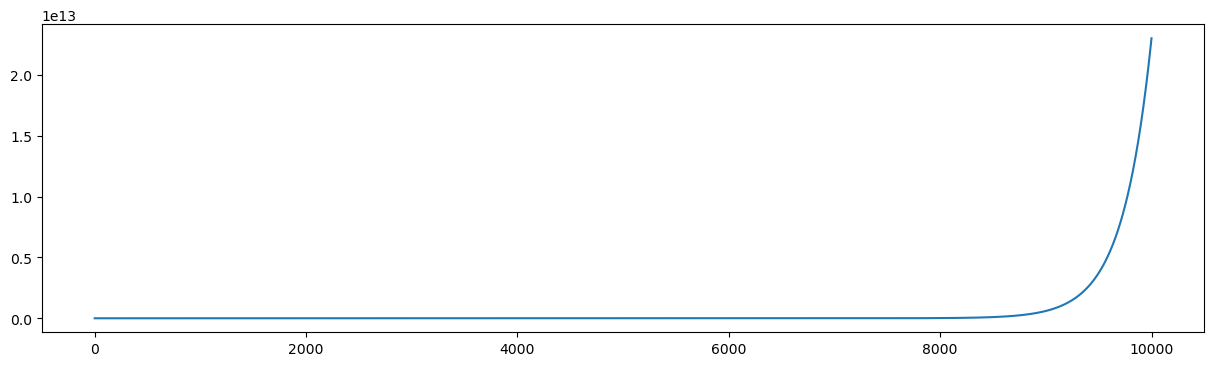

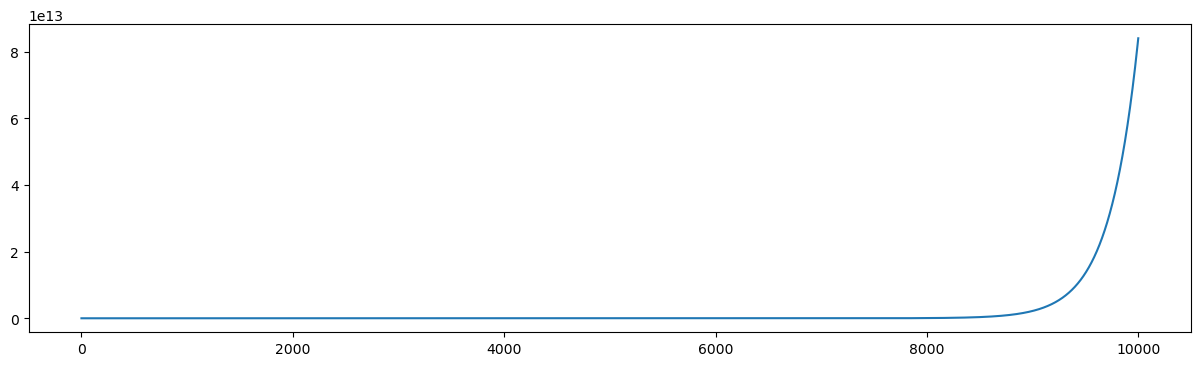

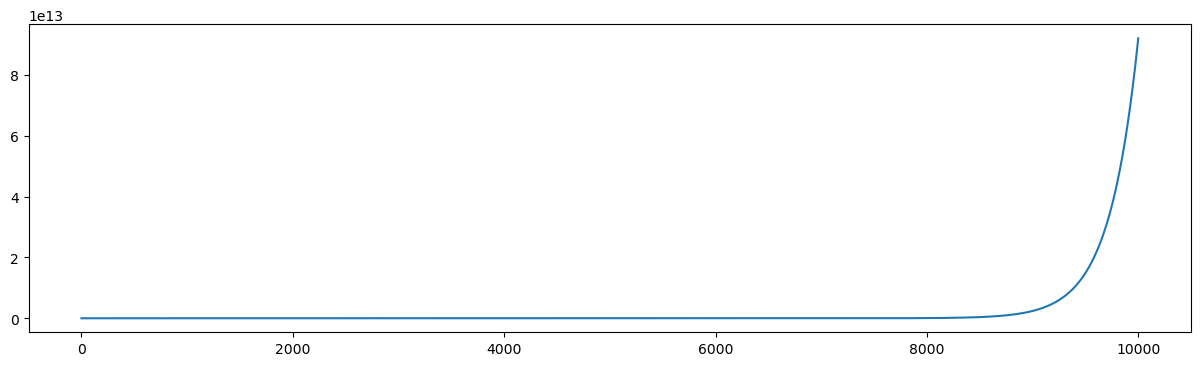

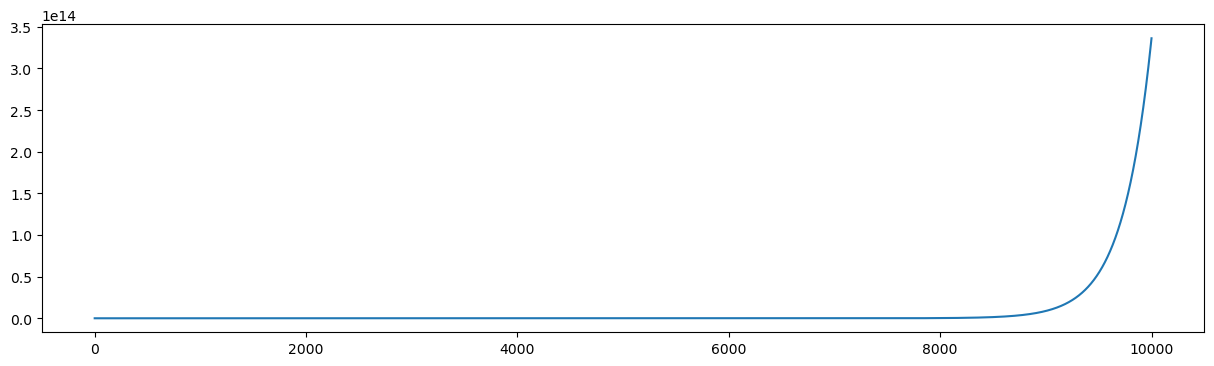

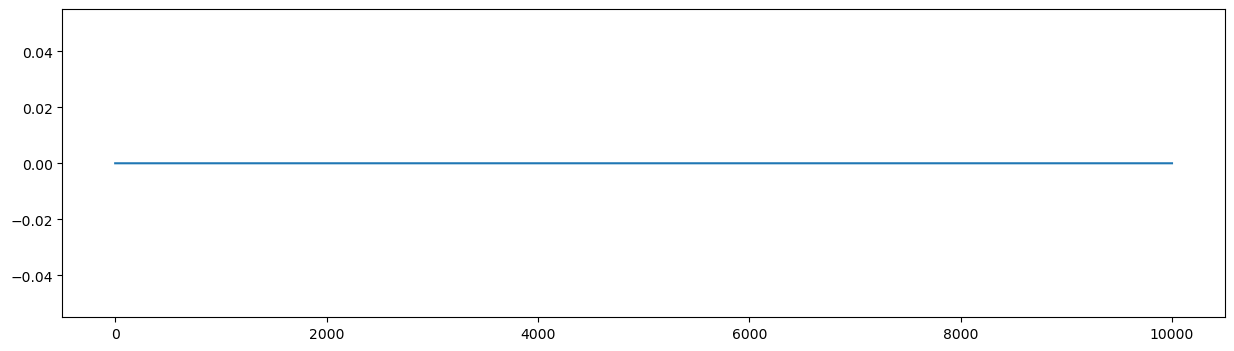

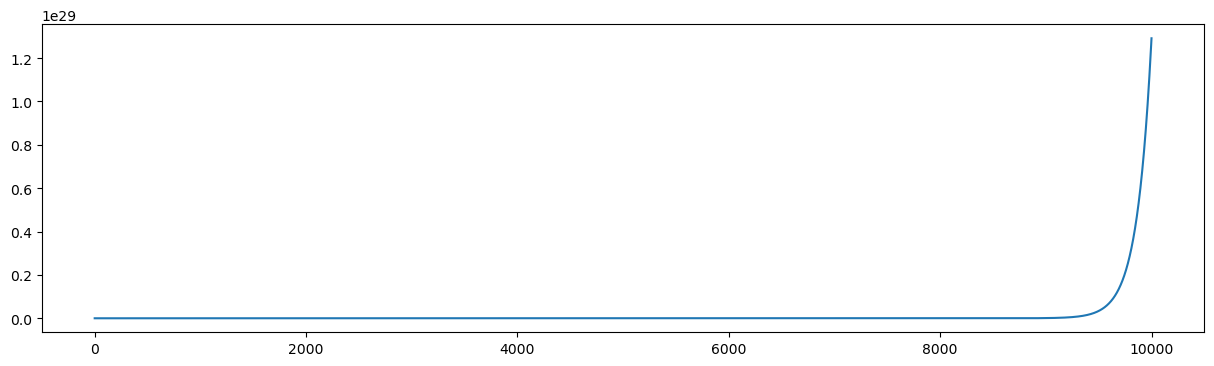

<Figure size 1500x1500 with 0 Axes>

([array([[0. ],
         [0. ],
         [0. ],
         [0.1]]),
  array([[0.    ],
         [0.    ],
         [0.0001],
         [0.1   ]]),
  array([[0.00000000e+00],
         [3.33333333e-07],
         [2.00000000e-04],
         [1.00001333e-01]]),
  array([[3.33333333e-10],
         [1.00000000e-06],
         [3.00001333e-04],
         [1.00004000e-01]]),
  array([[1.33333333e-09],
         [2.00000444e-06],
         [4.00005333e-04],
         [1.00008000e-01]]),
  array([[3.33333778e-09],
         [3.33335556e-06],
         [5.00013333e-04],
         [1.00013333e-01]]),
  array([[6.66669333e-09],
         [5.00006667e-06],
         [6.00026667e-04],
         [1.00020000e-01]]),
  array([[1.16667600e-08],
         [7.00015556e-06],
         [7.00046667e-04],
         [1.00028001e-01]]),
  array([[1.86669156e-08],
         [9.33364445e-06],
         [8.00074668e-04],
         [1.00037335e-01]]),
  array([[2.80005600e-08],
         [1.20005600e-05],
         [9.00112002e-04],
     

In [14]:
system = CartPole(x0=0.0, v0=0.0, phi0=0.0, w0=0.1, Q = np.eye(4), R = np.eye(1)*0.1)

run_and_plot_episode(system, 10000)

In [15]:
def draw_system(canvas, cr, cw, ch, system, u, t, color = (234, 23, 123)):
    if (canvas is None):
        canvas = np.ones((700, 1500, 3)) * 0
    
    h, w, _ = canvas.shape

    x = system.get_state()

    x_block, y_block = w//2+x[0,0], 3*h//4-h//100-ch//2
    x_ball, y_ball = x_block-system.l*sin(x[2,0]), y_block-system.l*cos(x[2,0])

    x_block, y_block = int(x_block), int(y_block)
    x_ball, y_ball = int(x_ball), int(y_ball)

    f_length = int(100*u[0,0]/((system.M+system.m)*system.g)) 

    clr1 = (144, 20, 222)
    clr2 = (255, 153, 0)
    white_clr = (255, 255, 255)
    blue_clr = (5, 41, 245)

    presicion = 4
    font = cv2.FONT_HERSHEY_SIMPLEX 
    
    cv2.line(canvas, (0, 3*h//4), (w, 3*h//4), white_clr, 2)
    cv2.rectangle(canvas, (x_block-cw//2, y_block-ch//2), (x_block+cw//2, y_block+ch//2), clr1, 2)
    cv2.circle(canvas, (x_ball, y_ball), cr, clr2, 2)
    cv2.line(canvas, (x_block,y_block), (x_ball,y_ball), white_clr, 3, lineType=4)

    if (abs(f_length) > 1):
        cv2.arrowedLine(canvas, (x_block+cw//2,y_block), (x_block+cw//2+f_length,y_block), blue_clr, 4) 
        cv2.putText(canvas,'F', (x_block+cw//2+f_length+10,y_block-10), font, 1, blue_clr, 4)

    cv2.putText(canvas,'x = {} m'.format(round(x[0,0], presicion)),(20,30), font, 1, clr1, 1)
    cv2.putText(canvas,'v  = {} m/sec'.format(round(x[1,0], presicion)),(20,60), font, 1, clr1, 1)
    cv2.putText(canvas,'phi = {} grad'.format(round(x[2,0], presicion)),(20,90), font, 1, clr2, 1)
    cv2.putText(canvas,'w  = {} grad/sec'.format(round(x[3,0], presicion)),(20,120), font, 1, clr2, 1)
    cv2.putText(canvas,'t    = {} sec'.format(round(t, 1)),(20,150), font, 1, white_clr, 1)
    cv2.putText(canvas,'F    = {} N'.format(round(u[0,0], presicion)),(20,180), font, 1, white_clr, 1)
    
    return canvas

In [16]:
def run_and_draw_episode(system, step = 1): 
    canvas = np.ones((700, 1500, 3), np.uint8) * 70
    
    i = 0
    t = 0.0
    
    while (True):
        state = system.get_state()

        key = cv2.waitKey(50) & 0xFF
        if (key == ord('f')):
            control = system.lqr_feedback(state)
        else:
            control = np.array([[0]])   

        x_dot = system.sys_dyn(control)
        #print("xdot: ", x_dot)
        
        system.integrate_sys_dyn(x_dot)
        
        canvas[:, :, :] = 70
        canvas = draw_system(canvas, 20, 100, 50, system, control, t)
        cv2.imshow("CartPole", canvas)

        i += step
        t += step*system.dt

        key = cv2.waitKey(10) & 0xFF
        if (key == ord('q')):
            break

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(10)

In [17]:
system = CartPole(dt=0.05, l=80.0, x0=0.0, v0=10.0, phi0=0.0, w0=0.1, Q = np.eye(4), R = np.eye(1)*0.5)

# run_and_plot_episode(system, iter_num = 175000)
run_and_draw_episode(system, step = 20)